In [1]:
import tensorflow as tf
import os
import numpy as np
import numpy.random as random_gen
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time
import model.rbm as rbm

#Load mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
mnist_train = mnist.train

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
#create the rbm machine. Keep in mind that mnist image inputs are 28 * 28 = 784
restricted_boltzman_machine_model = rbm.restricted_boltzman_machine(n_visible = 784, n_hidden = 64)

# Compute reconstruction error and update rule for weights and bias
 Positive divergence: $\mathbf{v_0^T \times p(h_0|v_0)}$
 
 Sample hidden states from: $\mathbf{h_0 \sim p(h_0|v_0)}$
 
 Reconstruct visible units: $\mathbf{v_s \sim p(v_{s})=p(v_1|h_0)}$
 
 Negative divergence: $\mathbf{p(v_{s})^T \times p(h_1|v_s)}$
 
 $w_{new} = w_{old} + \epsilon *$ (positive divergence - negative divergence)
 
 $vb_{new} = vb_{old} + \epsilon * (v_0 - p(v_s))$
 
 $vb_{new} = vb_{old} + \epsilon * (p(h_0) - p(h_1))$

In [4]:
rec_error, update = restricted_boltzman_machine_model.compute_rec_error_and_update(learning_rate = tf.constant(0.1,tf.float32))

# Start training using stochastic gradient descent

In [5]:
#start session
sess = tf.InteractiveSession()

# Merge summaries for Tensorboard
summary = tf.summary.merge_all()
path_test = os.getcwd()  + '/RBM_logs/MNIST_Bernoulli'
test_writer = tf.summary.FileWriter(path_test,sess.graph)

#init variables
sess.run(tf.global_variables_initializer())

steps = 2000
start_time = time.time()
##### Start of training ######
##### -----------------#######
for step in range(steps):
    #if step % 30 == 0: 
        #sess.run(reinit)
    if step % 500 == 0:
        feed={restricted_boltzman_machine_model.v: mnist.test.images}
        result = sess.run([rec_error,summary],feed_dict=feed)
        acc = result[0]
        test_writer.add_summary(result[1],step)
        print("Reconstruction error at step %s: %s" % (step, acc))
        #err[step] = sess.run(total_err)
        #print("Absolute gradient estimate of log-likelihood on epoch %s is %s" %(step,np.abs(err[step])))
    else: 
        batchXs, batchYs = mnist.train.next_batch(10)
        feed={restricted_boltzman_machine_model.v: batchXs}
        result = sess.run([update], feed_dict = feed)    
        # Print log-likelihood to visualize how it decreases 
    
##### --------------- ######        
##### End of Training ######



Reconstruction error at step 0: [0.31390214]
Reconstruction error at step 500: [0.033711769]
Reconstruction error at step 1000: [0.029708188]
Reconstruction error at step 1500: [0.027588811]


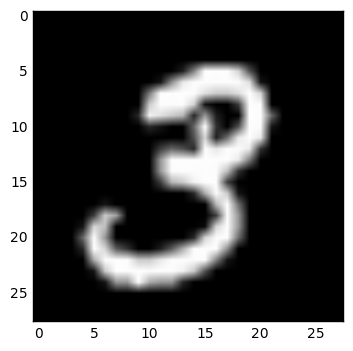

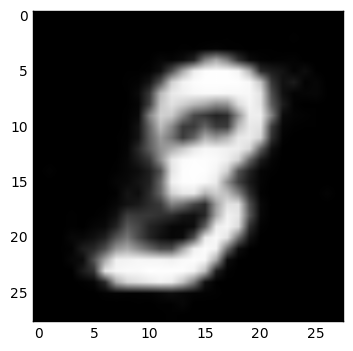

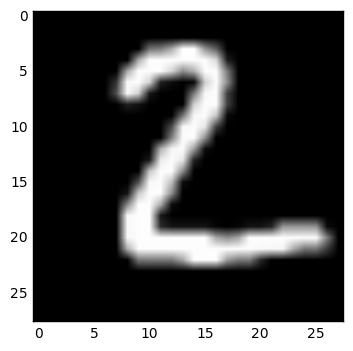

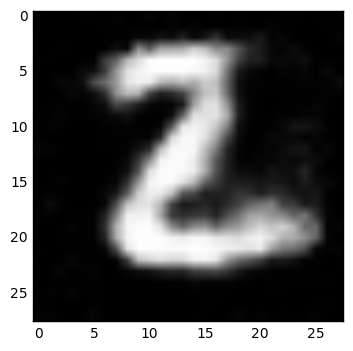

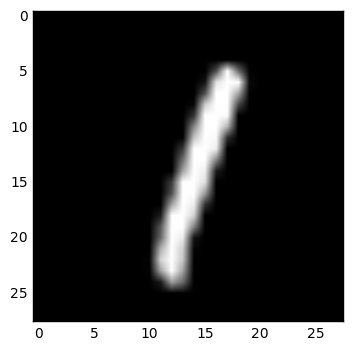

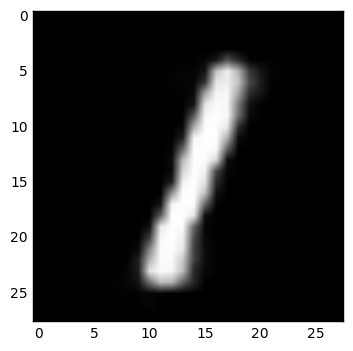

In [10]:
##### Testing ##### 
# Testing the RBM for one sample step after learning the weights        
first_image = 1
test_image_train = mnist_train.images[first_image] #train
test_image_test = mnist.test.images[first_image] #test
test_image_test1 = mnist.test.images[first_image+4] #test

def show_digit(x):
    plt.imshow(x.reshape((28,28)),cmap = plt.cm.gray)
    plt.show()

sample = restricted_boltzman_machine_model.gibbs(1).eval(session=sess, feed_dict={restricted_boltzman_machine_model.v: test_image_train.reshape(1,-1).astype(np.float32)})    
sample_test = restricted_boltzman_machine_model.gibbs(1).eval(session=sess, feed_dict={restricted_boltzman_machine_model.v: test_image_test.reshape(1,-1).astype(np.float32)})    
sample_test1 = restricted_boltzman_machine_model.gibbs(1).eval(session=sess, feed_dict={restricted_boltzman_machine_model.v: test_image_test1.reshape(1,-1).astype(np.float32)})    

show_digit(test_image)
show_digit(sample)

show_digit(test_image_test)
show_digit(sample_test)

show_digit(test_image_test1)
show_digit(sample_test1)
tf.reset_default_graph()